<a href="https://colab.research.google.com/github/Katetuna/innopolis/blob/main/HW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Упражнения
В этом упражнении рассматривается прогноз SARIMA, аналогичный тому, который был сделан для набора данных $CO_2$.



In [1]:
!pip install pmdarima

In [2]:
# 
import pandas as pd
import numpy as np
%matplotlib inline

# импорт SARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # для определения (p,q) 
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков
from pmdarima import auto_arima                              # для поиска ARIMA моделей

# метрики
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# для игнорирования предупреждений (опционально)
# import warnings
# warnings.filterwarnings("ignore")

# Загрузка датасета
df = pd.read_csv('/content/HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


В <tt>df</tt>  348 записей и 1 колонка. Данные представляют собой численность сотрудников в тысячах человек в среднем за месяц с января 1990 года по декабрь 2018 года.

### 1. Постройте график временного ряда


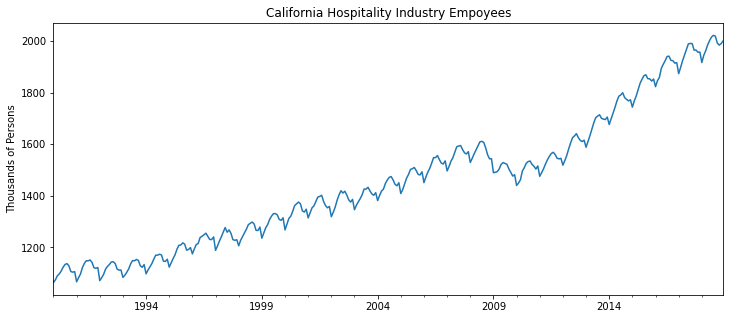

In [11]:
## Постройте график атрибута 'Employees'
title = "California Hospitality Industry Empoyees"
ylabel = "Thousands of Persons"
xlabel = ""
ax = df['Employees'].plot(figsize = (12,5) , title = title)
ax.set(xlabel = xlabel , ylabel=ylabel)
ax.autoscale(axis="x", tight = True)


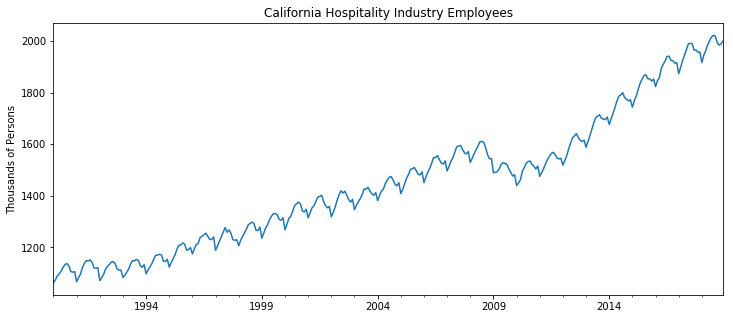

In [ ]:
# добавьте заголовок и подписи

### 2. Выполните ETS декомпозицию
Используя аддитивную модель ('additive').
Подсказка: функция seasonal_decompose

In [14]:
result = seasonal_decompose(df['Employees'], model ='add')

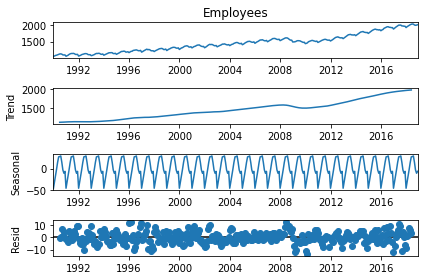

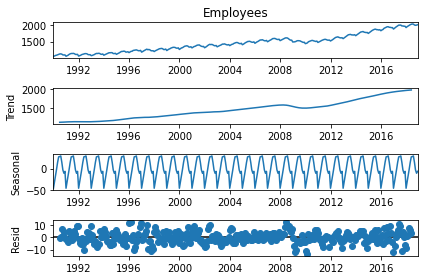

In [15]:
# отобразите результат
result.plot()

### 3. Запустите <tt>pmdarima.auto_arima</tt> чтобы получить набор параметров
Это может занять некоторое время, так как необходимо оценить множество комбинаций.

In [17]:
# Подсказка: используйте auto_arima
auto_arima(df["Employees"],seasonal = True, m=12).summary()

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,1,1)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 709, in fit
    skip_hessian=True, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py", line

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Thu, 03 Mar 2022   AIC                           2208.504
Time:                                      17:00:36   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.569      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.471      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.140      0.032       0.011       0.247
ar.S.L12       0.9972      0.001    703.740      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.321      0.000      -0.834      -0.664
sigma2        29.2997      1.717     17.062      0.000      25.934      32.665
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/U

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.307
Date:                              Sun, 07 Mar 2021   AIC                           2210.614
Time:                                      09:24:54   BIC                           2237.559
Sample:                                           0   HQIC                          2221.342
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.005      0.083      0.934      -0.010       0.011
ar.L1          0.9223      0.046     20.140      0.000       0.833       1.012
ma.L1         -0.9440      0.070    -13.421      0.000      -1.082      -0.806
ma.L2          0.1318      0.060      2.196      0.028       0.014       0.249
ar.S.L12       0.9977      0.001    717.060      0.000       0.995       1.000
ma.S.L12      -0.7573      0.042    -17.909      0.000      -0.840      -0.674
sigma2        29.1983      1.702     17.152      0.000      25.862      32.535
===================================================================================
Ljung-Box (Q):                       32.11   Jarque-Bera (JB):                66.37
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.09
Prob(H) (two-sided):                  0.45   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Ожидаемый результат ARIMA (0,1,0) с сезонностью (2,0,0,12).
(ваш результат может отличаться)
### 4. Разделите данные на train/test 
Установите один (последний) год (12 записей) для тестирования. Есть несколько способов сделать это!

In [18]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### 5. Обучите SARIMA(0,1,0)(2,0,0,12) на train['Employees']

In [21]:
#SARIMAX(1, 1, 2)x(1, 0, [1], 12)	
model = SARIMAX(train["Employees"], order = (1,1,2) , seasonal_order = (1,0,1,12))
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Thu, 03 Mar 2022   AIC                           2128.116
Time:                                      17:04:55   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.043     21.288      0.000       0.839       1.009
ma.L1         -0.9583      0.071    -13.552      0.000      -1.097      -0.820
ma.L2          0.1496      0.061      2.446      0.014       0.030       0.269
ar.S.L12       0.9973      0.001    731.133      0.000       0.995       1.000
ma.S.L12      -0.7519      0.044    -17.153      0.000      -0.838      -0.666
sigma2        28.7706      1.685     17.073      0.000      25.468      32.074
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.33
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Получите прогнозируемые значения

In [22]:
start = len(train)
end = len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename(' Predictions SARIMAX(1, 1, 2)x(1, 0, [1], 12)')

### 7. Нарисуйте графики прогнозируемых и известных значений


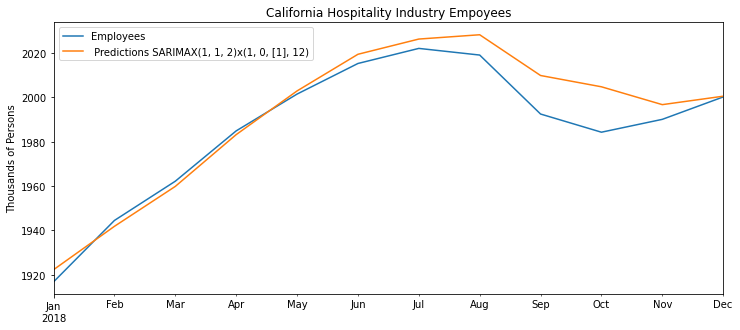

In [24]:
# ваш код
title = "California Hospitality Industry Empoyees"
ylabel = "Thousands of Persons"
xlabel = ""
ax = test['Employees'].plot(legend = True, figsize = (12,5) , title = title)
predictions.plot(legend = True)
ax.set(xlabel = xlabel , ylabel=ylabel)
ax.autoscale(axis="x", tight = True)


### 8. Оцените качество модели с помощью MSE и RMSE


In [26]:
# Подсказка: используйте функции mean_squared_error и rmse 
mse_value = mean_squared_error(test["Employees"],predictions)
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: {mse_value:11.10}')
rmse_value = rmse(test["Employees"],predictions)
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: {rmse_value:11.10}')

SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: 77.67620142
SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: 8.813410317


In [ ]:
# ваш код

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506646
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222854


### 9. Натренируйте модель на полном датасете и предскажите на год вперед

In [27]:
model = SARIMAX(df["Employees"], order = (1,1,2) , seasonal_order = (1,0,1,12))
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Thu, 03 Mar 2022   AIC                           2208.504
Time:                                      17:18:34   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.569      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.471      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.140      0.032       0.011       0.247
ar.S.L12       0.9972      0.001    703.740      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.321      0.000      -0.834      -0.664
sigma2        29.2997      1.717     17.062      0.000      25.934      32.665
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
# для прогнозирования используйте с нужными параметрами results.predict() -- см. выше
fcast = results.predict(len(df), len(df)+123, typ = "levels").rename('SARIMAX(1, 1, 2)x(1, 0, [1], 12)')

### 10. Постройте график предсказаний и график исходных данных


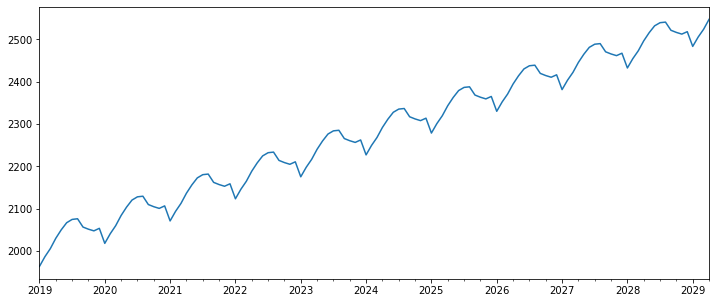

In [30]:
fcast.plot(figsize = (12,5))

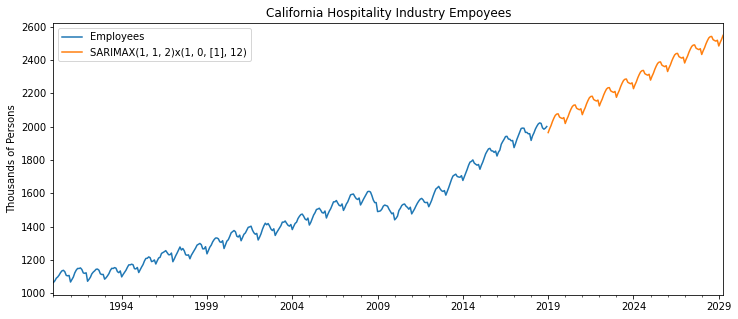

In [33]:
# отобразите общий график
title = "California Hospitality Industry Empoyees"
ylabel = "Thousands of Persons"
xlabel = ""
ax = df['Employees'].plot(legend = True, figsize = (12,5) , title = title)
fcast.plot(legend = True)
ax.set(xlabel = xlabel , ylabel=ylabel)
ax.autoscale(axis="x", tight = True)